# INFERENTIAL STATISTICS CODED PROJECT

In [232]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions
from scipy.stats import norm
from scipy.stats import t

## Problem no. 1

### A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

### 1.1 What is the probability that a randomly chosen player would suffer an injury?

In [233]:
Total_no_of_Players_injured = 145
Total_no_of_players = 235
prob1 = Total_no_of_Players_injured/Total_no_of_players
round(prob1,3)

0.617

### 1.2 What is the probability that a player is a forward or a winger?

In [234]:
forward_Players = 94
wingers = 29
total_no_of_players = 235
forward_and_wingers = forward_Players + wingers
prob2 = forward_and_wingers/total_no_of_players
round(prob2,3)

0.523

### 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [ ]:
injured_strikers = 45
total_no_of_players = 235
prob3 = injured_strikers/total_no_of_players
round(prob3,3)

0.191

### 1.4 What is the probability that a randomly chosen injured player is a striker?

In [ ]:
injured_strikers = 45
injured_players = 145
prob4 = injured_strikers/injured_players
round(prob4,3)

0.31

## Problem no. 2

In [237]:
mu = 5
sigma = 1.5


### **2.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?**

In [238]:
q_21 = norm.cdf(3.17,mu,sigma)
round(q_21, 4)

0.1112

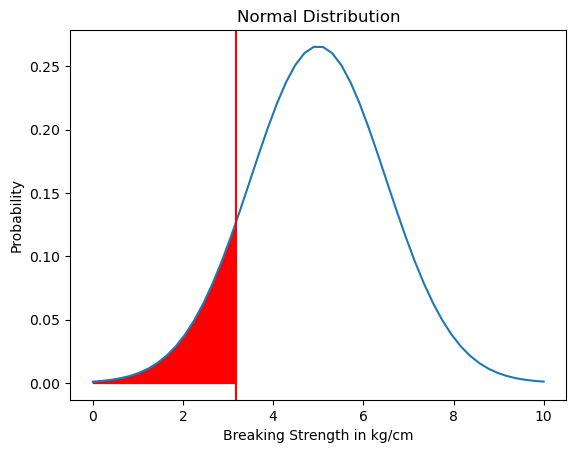

In [239]:
x = np.linspace(0, 10, 50)
plt.plot(x, norm.pdf(x, loc = 5, scale = 1.5))
plt.axvline(3.17, c="r")

x1 = np.linspace(0, 3.17, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")

plt.xlabel("Breaking Strength in kg/cm") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution");

 ### **2.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?**

In [240]:
q_22 = 1 - norm.cdf(3.6,mu,sigma)
round(q_22, 4) 

0.8247

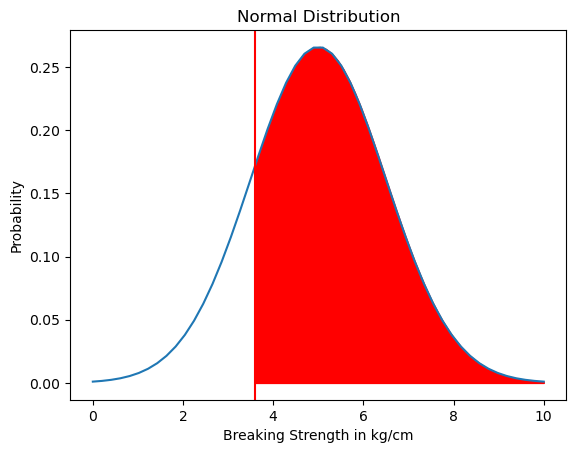

In [241]:
x = np.linspace(0, 10, 50)
plt.plot(x, norm.pdf(x, loc = 5, scale = 1.5))
plt.axvline(3.6, c="r")

x1 = np.linspace(3.6, 10, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")

plt.xlabel("Breaking Strength in kg/cm") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution");

### 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [242]:
q_23 = norm.cdf(5.5,mu,sigma) - norm.cdf(5,mu,sigma)
round(q_23, 4)

0.1306

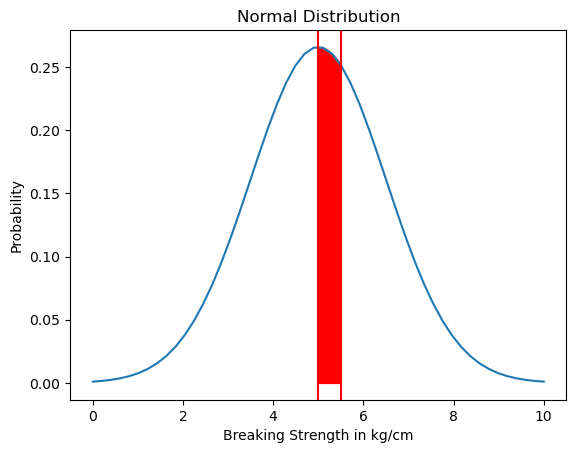

In [243]:
x = np.linspace(0, 10, 50)
plt.plot(x, norm.pdf(x, loc = 5, scale = 1.5))
plt.axvline(5, c="r")
plt.axvline(5.5, c="r")
x1 = np.linspace(5, 5.5, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")

plt.xlabel("Breaking Strength in kg/cm") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution");

### 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [244]:
q_24_p1 = norm.cdf(3,mu,sigma)
q_24_p2 = 1-norm.cdf(7.5,mu,sigma)
q_24 = q_24_p1 + q_24_p2
round(q_24, 4)

0.139

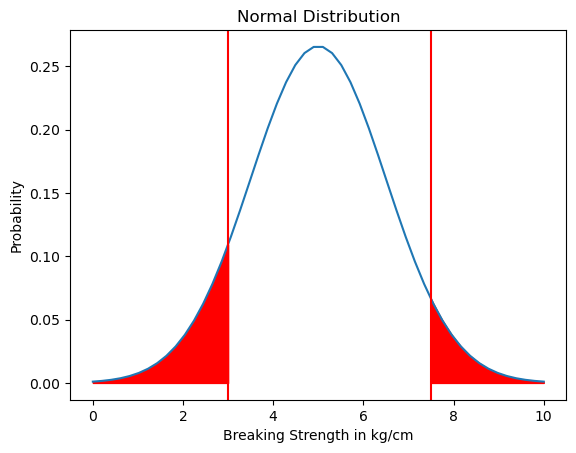

In [245]:
x = np.linspace(0, 10, 50)
plt.plot(x, norm.pdf(x, loc = 5, scale = 1.5))
plt.axvline(3, c="r")
plt.axvline(7.5, c="r")
x1 = np.linspace(0, 3, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")

x2 = np.linspace(7.5, 10, 50)
plt.fill_between(x2, norm.pdf(x2, mu, sigma), color="r")

plt.xlabel("Breaking Strength in kg/cm") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution");

## Problem no. 3

In [246]:
z = pd.read_csv(r"C:\Users\LOKI\Downloads\Zingaro_Company.csv")

In [247]:
z.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [248]:
z.isnull().sum()

Unpolished              0
Treated and Polished    0
dtype: int64

In [249]:
z.shape

(75, 2)

In [250]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [251]:
z.describe().T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


In [252]:
print("1-Sample T-test")
#import the required functions
from scipy.stats import ttest_1samp

# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(z['Unpolished '], popmean = 150, alternative = 'less')
print('The test_stat is ', test_stat)
print('The p-value is ', p_value)

1-Sample T-test
The test_stat is  -4.164629601426757
The p-value is  4.171286997419652e-05


In [253]:
#import the required functions
from scipy.stats import ttest_1samp

# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(z['Treated and Polished'], popmean = 150, alternative = 'less')
print('The test_stat is ', test_stat)
print('The p-value is ', p_value)

The test_stat is  -1.228910663544687
The p-value is  0.11149948416904217


In [254]:
print("2 Independent-Sample T-test")
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(z['Unpolished '], z['Treated and Polished'])
print('The test_stat is ', test_stat)
print('The p-value is ', p_value)

2 Independent-Sample T-test
The test_stat is  -3.2422320501414053
The p-value is  0.0014655150194628353


## Problem no. 4

### Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [255]:
d = pd.read_excel(r"C:\Users\LOKI\Downloads\Dental+Hardness+data.xlsx")

In [256]:
d.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [257]:
d.isnull().sum()

Dentist     0
Method      0
Alloy       0
Temp        0
Response    0
dtype: int64

In [258]:
d.shape

(90, 5)

In [259]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [260]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


In [261]:
d["Dentist"].value_counts()

1    18
2    18
3    18
4    18
5    18
Name: Dentist, dtype: int64

In [262]:
d["Method"].value_counts()

1    30
2    30
3    30
Name: Method, dtype: int64

In [263]:
d["Alloy"].value_counts()

1    45
2    45
Name: Alloy, dtype: int64

In [264]:
d.Dentist = pd.Categorical(d.Dentist)
d.Method = pd.Categorical(d.Method)
d.Alloy = pd.Categorical(d.Alloy)

In [265]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     int64   
 4   Response  90 non-null     int64   
dtypes: category(3), int64(2)
memory usage: 2.3 KB


In [266]:
alloy_1 = d[d["Alloy"]==1]
alloy_2 = d[d["Alloy"]==2]

In [267]:
#Importing libraries for ANOVA test
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

### 4.1 How does the hardness of implants vary depending on dentists?

In [268]:
d.groupby(["Alloy","Dentist"])["Response"].mean()

Alloy  Dentist
1      1          749.888889
       2          761.222222
       3          717.555556
       4          681.111111
       5          627.666667
2      1          816.222222
       2          812.111111
       3          779.666667
       4          746.222222
       5          726.111111
Name: Response, dtype: float64

<Axes: xlabel='Dentist', ylabel='Response'>

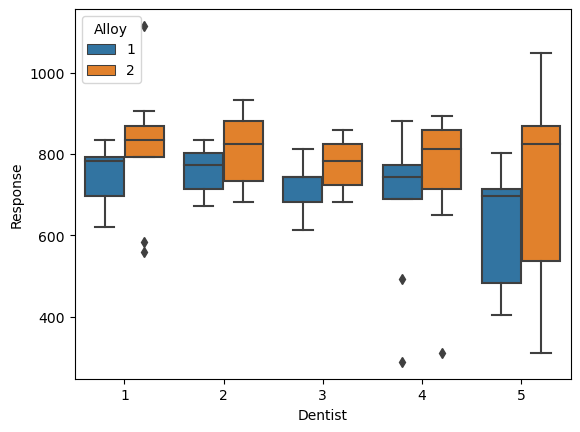

In [269]:
sns.boxplot(d, x="Dentist", y="Response", hue = "Alloy")

**Assumptions of the test**

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The hardness follow a normal distribution

against the alternative hypothesis

>$H_a:$ The hardness do not not follow a normal distribution

In [270]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
t_statsistic, p_value = stats.shapiro(alloy_1["Response"]) 
print('The t_statsistic is', t_statsistic)
print('The p-value is', p_value)

The t_statsistic is 0.8304629921913147
The p-value is 1.1945070582441986e-05


Since p-value of the test is smaller than the significance level(0.05), we can reject the null hypothesis and the response doesn't follows the normal distribution.

In [271]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
t_statsistic, p_value = stats.shapiro(alloy_2["Response"]) 
print('The t_statsistic is', t_statsistic)
print('The p-value is', p_value)

The t_statsistic is 0.887769341468811
The p-value is 0.00040293222991749644


Since p-value of the test is smaller than the significance level(0.05), we can reject the null hypothesis and the response doesn't follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [272]:
t_statistic, p_value = stats.levene(d[d['Dentist']==1]["Response"],
                            d[d['Dentist']==2]["Response"],
                            d[d['Dentist']==3]["Response"],
                            d[d['Dentist']==4]["Response"],
                            d[d['Dentist']==5]["Response"])
print('The t_statsistic is', t_statsistic)
print('The p-value is', p_value)

The t_statsistic is 0.887769341468811
The p-value is 0.007858817382355401


Since p-value of the test is smaller than the significance level(0.05), we can reject the null hypothesis.

The null and alternative hypotheses can be formulated as:

> $H_0$ : The Mean Implant hardness is same across all the **dentists** for Alloy 1 ($\mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5$) <br>

> $H_a$ : At least one pair of dentists is different from the rest for Alloy 1

In [289]:
print('---------------------------Alloy 1------------------------------')
formula = 'Response ~ C(Dentist)'
model = ols(formula, alloy_1).fit()
aov_table = anova_lm(model)
print(aov_table)

---------------------------Alloy 1------------------------------
              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


The p-value (0.116567) is greater than the signifance level (α = 0.05). So, we fail to reject the null hypothesis.

The null and alternative hypotheses can be formulated as:

> $H_0$ : The Mean Implant hardness is same across all the **dentists** for Alloy 2 ($\mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5$) <br>

> $H_a$ : At least one pair of dentists is different from the rest for Alloy 2

In [274]:
print('---------------------------Alloy 2------------------------------')
formula = 'Response ~ C(Dentist)'
model = ols(formula, alloy_2).fit()
aov_table = anova_lm(model)
print(aov_table)

---------------------------Alloy 2------------------------------
              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


The p-value (0.718031) is greater than the signifance level (α = 0.05). So, we fail to reject the null hypothesis.

### 4.2 How does the hardness of implants vary depending on methods?

In [275]:
d.groupby(["Alloy","Method"])["Response"].mean()

Alloy  Method
1      1         751.133333
       2         745.000000
       3         626.333333
2      1         836.666667
       2         863.666667
       3         627.866667
Name: Response, dtype: float64

<Axes: xlabel='Method', ylabel='Response'>

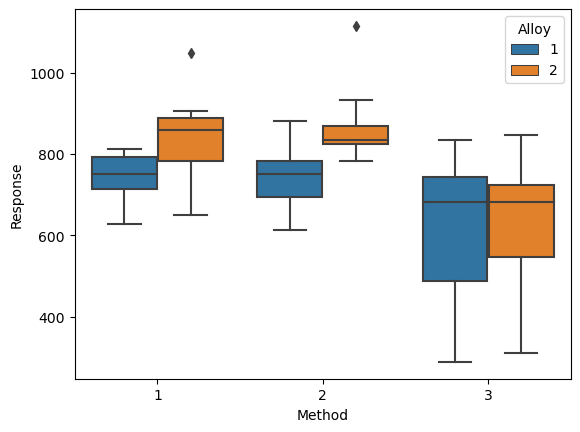

In [276]:
sns.boxplot(d, x="Method", y="Response", hue = "Alloy")

**Assumptions of the test**

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The hardness follow a normal distribution

against the alternative hypothesis

>$H_a:$ The hardness do not not follow a normal distribution

In [277]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
t_statsistic, p_value = stats.shapiro(alloy_1["Response"]) 
print('The t_statsistic is', t_statsistic)
print('The p-value is', p_value)

The t_statsistic is 0.8304629921913147
The p-value is 1.1945070582441986e-05


In [278]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
t_statsistic, p_value = stats.shapiro(alloy_2["Response"]) 
print('The t_statsistic is', t_statsistic)
print('The p-value is', p_value)

The t_statsistic is 0.887769341468811
The p-value is 0.00040293222991749644


Since p-value of the test is smaller than the significance level(0.05), we can reject the null hypothesis and the response doesn't follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [279]:
t_statistic, p_value = stats.levene(d[d['Method']==1]["Response"],
                            d[d['Method']==2]["Response"],
                            d[d['Method']==3]["Response"])
print('The t_statsistic is', t_statsistic)
print('The p-value is', p_value)

The t_statsistic is 0.887769341468811
The p-value is 0.004138452940152019


Since p-value of the test is larger than the significance level(0.05), we fail to reject the null hypothesis.

The null and alternative hypotheses can be formulated as:

> $H_0$ : The Mean Implant hardness is same across all the **Methods** for Alloy 1 ($\mu_1 = \mu_2 = \mu_3$) <br>

> $H_a$ : At least one pair of Method is different from the rest for Alloy 1

In [280]:
print('---------------------------Alloy 1------------------------------')
formula = 'Response ~ C(Method)'
model = ols(formula, alloy_1).fit()
aov_table = anova_lm(model)
print(aov_table)

---------------------------Alloy 1------------------------------
             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


The p-value (0.004163) is smaller than the signifance level (α = 0.05). So, we can reject the null hypothesis and have evidence for alternate hypothesis.

The null and alternative hypotheses can be formulated as:

> $H_0$ : The Mean Implant hardness is same across all the **Methods** for Alloy 2 ($\mu_1 = \mu_2 = \mu_3$) <br>

> $H_a$ : At least one pair of Method is different from the rest for Alloy 2

In [281]:
print('---------------------------Alloy 2------------------------------')
formula = 'Response ~ C(Method)'
model = ols(formula, alloy_2).fit()
aov_table = anova_lm(model)
print(aov_table)

---------------------------Alloy 2------------------------------
             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


The p-value (0.000005) is smaller than the signifance level (α = 0.05). So, we can reject the null hypothesis and have evidence for alternate hypothesis.

### Multiple Comparison test (Tukey HSD)
The null and alternative hypotheses can be formulated as:

> $H_0$ : µ1 = µ2 (and) µ1 = µ3 (and) µ1 = µ2>

> $H_a$ : µ1 ≠ µ2  (or) µ1 ≠ µ3 (or) µ2 ≠ µ3 

In [282]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print('------------------------Alloy 1-------------------------')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = alloy_1['Response'], groups = alloy_1['Method'], alpha = 0.05)
print(m_comp)

------------------------Alloy 1-------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


In [283]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print('------------------------Alloy 2-------------------------')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = alloy_2['Response'], groups = alloy_2['Method'], alpha = 0.05)
print(m_comp)

------------------------Alloy 2-------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


As the p-value for comparing the mean hardness for the pair Method1 - Method3 and Method2 - Method3 is less than theh significance level (α=0.05), the null hypothesis can be rejected.
Thus, we can say that the mean hardness for Method1 and Method2 is similar but Method3 is significantly different from the other two methods.

###  4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

**Interaction Plot:**

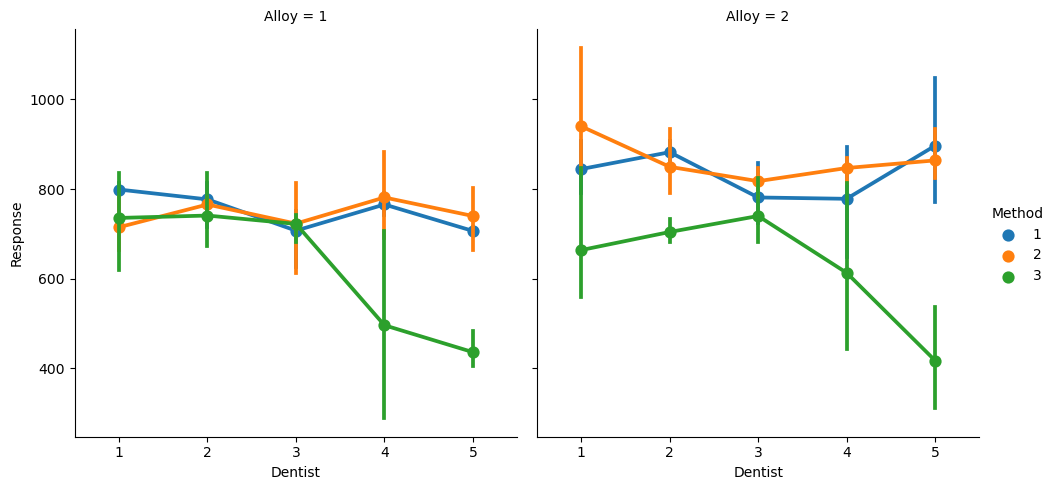

In [284]:
sns.catplot(data=d,x='Dentist',y='Response',hue='Method',col="Alloy",kind="point");

### 4.4 How does the hardness of implants vary depending on dentists and methods together?

The null and alternative hypotheses can be formulated as:

> $H_0$ : The effect of `Dentist` on `Method` does not depend on the effect of the Implant Hardness (`Response` variable)for Alloy1 (no interaction effect)

> $H_a$ : There is an interaction effect between `Dentist` and `Method` on Implant Hardness for Alloy1 (`Response` variable).

In [285]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
print('----------------------------------Alloy 1-----------------------------------')
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, alloy_1).fit()
aov_table = anova_lm(model)
print(aov_table)

----------------------------------Alloy 1-----------------------------------
                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


The null and alternative hypotheses can be formulated as:

> $H_0$ : The effect of `Dentist` on `Method` does not depend on the effect of the Implant Hardness (`Response` variable)for Alloy2 (no interaction effect)

> $H_a$ : There is an interaction effect between `Dentist` and `Method` on Implant Hardness for Alloy2 (`Response` variable).

In [286]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
print('----------------------------------Alloy 2-----------------------------------')
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, alloy_2).fit()
aov_table = anova_lm(model)
print(aov_table)

----------------------------------Alloy 2-----------------------------------
                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


In [287]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print('------------------------Alloy 1-------------------------')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = alloy_1['Response'], groups = alloy_1['Dentist'], alpha = 0.05)
print(m_comp)
print('------------------------Alloy 2-------------------------')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = alloy_2['Response'], groups = alloy_2['Dentist'], alpha = 0.05)
print(m_comp)

------------------------Alloy 1-------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   11.3333 0.9996 -145.0423  167.709  False
     1      3  -32.3333 0.9757  -188.709 124.0423  False
     1      4  -68.7778 0.7189 -225.1535  87.5979  False
     1      5 -122.2222 0.1889 -278.5979  34.1535  False
     2      3  -43.6667 0.9298 -200.0423  112.709  False
     2      4  -80.1111 0.5916 -236.4868  76.2646  False
     2      5 -133.5556 0.1258 -289.9312  22.8201  False
     3      4  -36.4444 0.9626 -192.8201 119.9312  False
     3      5  -89.8889 0.4805 -246.2646  66.4868  False
     4      5  -53.4444 0.8643 -209.8201 102.9312  False
--------------------------------------------------------
------------------------Alloy 2-------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    

In [288]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print('------------------------Alloy 1-------------------------')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = alloy_1['Response'], groups = alloy_1['Method'], alpha = 0.05)
print(m_comp)
print('------------------------Alloy 2-------------------------')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = alloy_2['Response'], groups = alloy_2['Method'], alpha = 0.05)
print(m_comp)

------------------------Alloy 1-------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------
------------------------Alloy 2-------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------
